# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import os

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# URL, units (Imperial), and api key setup
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = '&units=imperial'
api_key = f'&appid={weather_api_key}'

# Counters below keep track of the city for each set 
# (every 50 cities, a new set will be created)
count = 0
set = 1

# Lists for weather related data
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []          

# Loop to go over every city in the cities list
for x in range(len(cities)):
    # Added time delay to adhere to rate limiting restrictions on the API
    time.sleep(1)
    count += 1
    if count%50 == 0:
        set +=1
        count = 0
    
    # Inserted the city name and api key to the query url
    loc = f'&q={cities[x]}'
    query_url = url + api_key + loc + units
    response = requests.get(query_url)
    
    try:
        # Response test for try
        response.raise_for_status()
        # Once passed, the query is updated and information is pulled from the API 
        query_url = url + api_key + loc
        response = response.json()
        city.append(cities[x])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])           
        max_temp.append(response["main"]["temp_max"])      
        humidity.append(response["main"]["humidity"])     
        cloudiness.append(response["clouds"]["all"])   
        wind_speed.append(response["wind"]["speed"])    
        country.append(response["sys"]["country"])       
        date.append(response["dt"]) 
        print(f'Processing Record {count} of Set {set} | {cities[x]}')
        
    except requests.exceptions.HTTPError:
        print('City not found. Skipping...')
        pass

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Processing Record 1 of Set 1 | bathsheba
Processing Record 2 of Set 1 | marienburg
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | salisbury
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | barrow
City not found. Skipping...
Processing Record 11 of Set 1 | ostrovnoy
City not found. Skipping...
Processing Record 13 of Set 1 | tautira
Processing Record 14 of Set 1 | powell river
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | forrest city
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | saint anthony
City not found. Skipping...
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | scranton
Processing Record 23 of Set 1 | mataura
City not found. Skipping...
Processing Record 25 of Set 1 | beyneu
Processing Record 26 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
series = ({'City': city,
            'Lat': lat,
            'Lng': lng,
            'Max Temp': max_temp,
            'Humidity': humidity,
            'Cloudiness': cloudiness,
            'Wind Speed': wind_speed,
            'Country': country,
            'Date': date})
df = pd.DataFrame(series)
df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [15]:
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bathsheba,13.22,-59.52,82.40,78,40,13.87,BB,1594702999
1,marienburg,54.04,19.03,54.00,100,0,3.36,PL,1594703000
2,butaritari,3.07,172.79,81.03,78,97,12.19,KI,1594703001
3,carnarvon,-24.87,113.63,73.40,64,75,12.75,AU,1594703002
4,port elizabeth,-33.92,25.57,48.20,87,40,33.33,ZA,1594703004


In [16]:
file_path = os.path.join('output_data', 'cities.csv')
df.to_csv(file_path, header=True, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [111]:
# Load the file that was previously exported
file_path = os.path.join('output_data', 'cities.csv')
df = pd.read_csv(file_path)
# Transform date data to a more readable format.
df['Date'] = pd.to_datetime(df['Date'], unit='s')
# Reformatted the date and removed the time information
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bathsheba,13.22,-59.52,82.40,78,40,13.87,BB,07/14/2020
1,marienburg,54.04,19.03,54.00,100,0,3.36,PL,07/14/2020
2,butaritari,3.07,172.79,81.03,78,97,12.19,KI,07/14/2020
3,carnarvon,-24.87,113.63,73.40,64,75,12.75,AU,07/14/2020
4,port elizabeth,-33.92,25.57,48.20,87,40,33.33,ZA,07/14/2020
...,...,...,...,...,...,...,...,...,...
563,bosanska krupa,44.88,16.15,56.10,75,77,2.13,BA,07/14/2020
564,monte gordo,37.18,-7.45,73.40,88,0,5.82,PT,07/14/2020
565,pierre,44.37,-100.35,75.00,49,1,16.11,US,07/14/2020
566,laredo,27.51,-99.51,89.60,43,1,16.11,US,07/14/2020


In [41]:
#  Get the indices of cities that have humidity over 100%.
# No cities were found to have an index over 100
index_list = df.loc[df['Humidity'] > 100].index.tolist()
index_list

[]

In [43]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Skipped due to data not containing humidity over 100

In [121]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

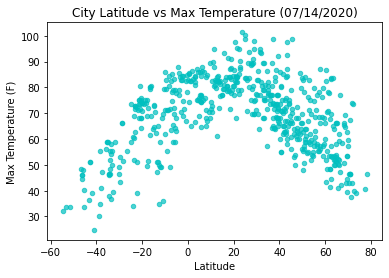

In [138]:
# Obtain date information
date = df.Date[0]

# Plot
ax1 = df.plot.scatter(x='Lat', 
                      y='Max Temp', 
                      c='c', 
                      alpha=.7,
                      title=f'City Latitude vs Max Temperature ({date})')
ax1.set_ylabel('Max Temperature (F)')
ax1.set_xlabel('Latitude')

# Export plot image
plt.savefig('images/lat_vs_temp.png')
plt.show()

## Latitude vs. Humidity Plot

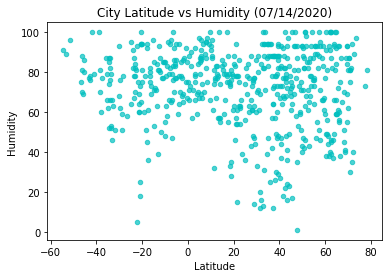

In [143]:
# Plot
ax1 = df.plot.scatter(x='Lat', 
                      y='Humidity', 
                      c='c', 
                      alpha=.7,
                      title=f'City Latitude vs Humidity ({date})')
ax1.set_ylabel('Humidity (%)')
ax1.set_xlabel('Latitude')

# Export plot image
plt.savefig('images/lat_vs_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

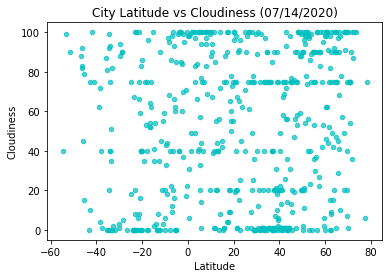

In [149]:
# Plot
ax1 = df.plot.scatter(x='Lat', 
                      y='Cloudiness', 
                      c='c', 
                      alpha=.7,
                      title=f'City Latitude vs Cloudiness ({date})')
ax1.set_ylabel('Cloudiness (%)')
ax1.set_xlabel('Latitude')

# Export plot image
plt.savefig('images/lat_vs_cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

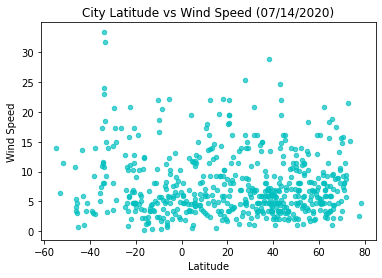

In [150]:
# Plot
ax1 = df.plot.scatter(x='Lat', 
                      y='Wind Speed', 
                      c='c', 
                      alpha=.7,
                      title=f'City Latitude vs Wind Speed ({date})')
ax1.set_ylabel('Wind Speed (mph)')
ax1.set_xlabel('Latitude')

# Export plot image
plt.savefig('images/lat_vs_windspeed.png')
plt.show()

## Linear Regression

In [226]:
# OPTIONAL: Create a function to create Linear Regression plots

# Regression functions
# Northern Hemisphere
def n_regsn(df, x, y, xlabel, ylabel):
    df = df.loc[df[x] > 0]
    x_values = df[x]
    y_values = df[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, c='c', alpha=.7)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0,40),fontsize=10,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # Print and return
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f'images/Northern {xlabel} vs {ylabel}')
    return plt.show()

# Southern Hemisphere
def s_regsn(df, x, y, xlabel, ylabel):
    df = df.loc[df[x] < 0]
    x_values = df[x]
    y_values = df[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, c='c')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(-40,25),fontsize=10,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # Print and return
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f'images/Southern {xlabel} vs {ylabel}')
    return plt.show()

In [227]:
# Create Northern and Southern Hemisphere DataFrames
# This was created in the function

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4152731975993597


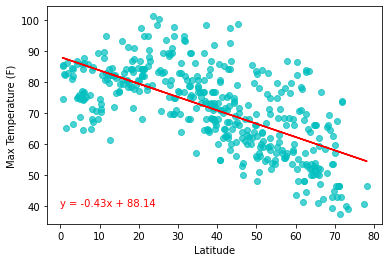

In [228]:
n_regsn(df, 'Lat', 'Max Temp', 'Latitude', 'Max Temperature (F)')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5186357971735274


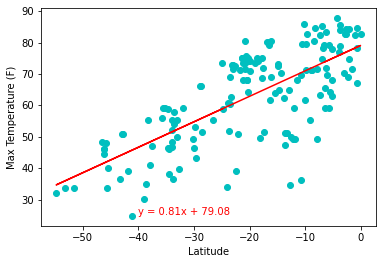

In [229]:
s_regsn(df, 'Lat', 'Max Temp', 'Latitude', 'Max Temperature (F)')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0030974416156992917


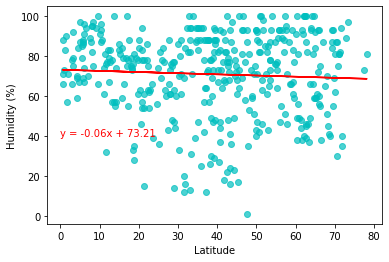

In [230]:
n_regsn(df, 'Lat', 'Humidity', 'Latitude', 'Humidity (%)')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.4293002205038324e-05


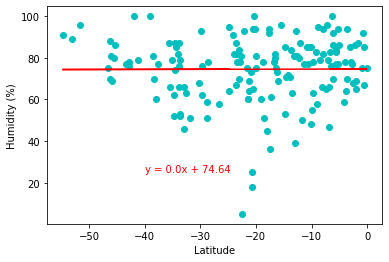

In [231]:
s_regsn(df, 'Lat', 'Humidity','Latitude', 'Humidity (%)')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0031159305478062832


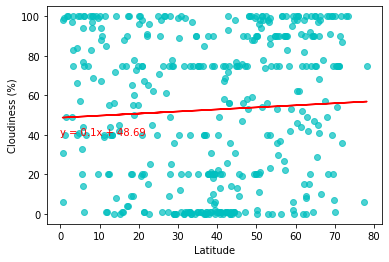

In [232]:
n_regsn(df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness (%)')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 8.234825199847649e-06


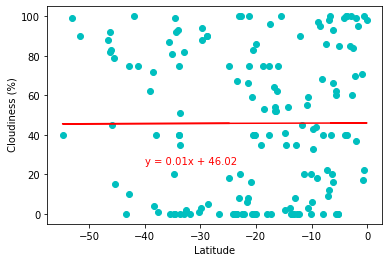

In [233]:
s_regsn(df, 'Lat', 'Cloudiness','Latitude', ' Cloudiness (%)')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00019544811271209053


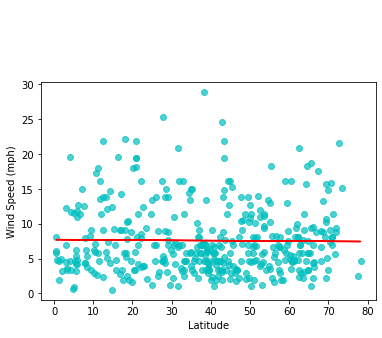

In [234]:
n_regsn(df, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed (mph)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.038126136348474844


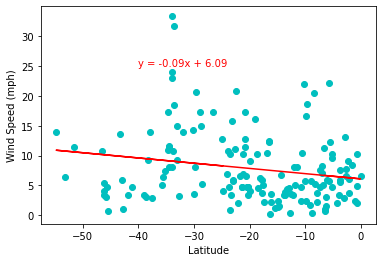

In [235]:
s_regsn(df, 'Lat', 'Wind Speed','Latitude', 'Wind Speed (mph)')